In [1]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scripts.plots_stats.get_df_ssp import get_df_ssp

In [2]:
df_ssp = get_df_ssp()

(30544, 23) (30544, 23) (30544, 23) (30498, 23) (30498, 23) (30498, 23)
(30498, 41) (30544, 41)
Total number of cities 30498


In [3]:
# for buildings consider, bedoom size = 34 m3, parking length = 5.5m
# Standead aprtment size  = 260 m3, 
# Standead 3 bed aprtment size  = 340 m3,
# a median single-family housing unit of 187 square meters with 4.6 m floor height, = 860.2 m3

df_ssp[df_ssp['volume_m3_perCap_2020_ssp2']<=10000].shape

(30474, 179)

In [4]:
df_less_than_10000 = df_ssp[df_ssp['volume_m3_perCap_2020_ssp2']<=10000][['GEOID','city type', 'REGION','CensusPop_20','volume_m3_perCap_2020_ssp2', 'volume_m3_perCap_2030_ssp2','length_m_perCap_2020_ssp2', 
        'length_m_perCap_2030_ssp2', 'added_RBUV_2020_2050', 'added_RBUV_2050_2100', 'added_RL_2020_2050', 'added_RL_2050_2100','RL_Burden_2050', 'RL_Burden_2100', 'RBUV_Burden_2050','RBUV_Burden_2100']].reset_index(drop=True)

In [5]:
df_ssp[df_ssp['volume_m3_perCap_2020_ssp2']<=10000][['added_RBUV_2020_2050', 'added_RBUV_2050_2100','added_RL_2020_2050','added_RL_2050_2100',]].mean()

added_RBUV_2020_2050     29.536126
added_RBUV_2050_2100    144.772829
added_RL_2020_2050        1.579109
added_RL_2050_2100       10.229380
dtype: float64

In [6]:
import pandas as pd

def assign_values_based_on_conditions(df, column_to_check, column_to_assign, conditions):
    """
    Compares a column in a DataFrame with conditions and assigns values to another column.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column_to_check (str): The name of the column to evaluate.
    - column_to_assign (str): The name of the column to assign values to.
    - conditions (dict): A dictionary where keys are lambda functions (conditions) 
      and values are the corresponding assignment values.
    
    Returns:
    - pd.DataFrame: The DataFrame with the new or updated column.
    """
    # Ensure the column to assign exists
    if column_to_assign not in df.columns:
        df[column_to_assign] = None
    
    # Apply each condition in the dictionary
    for condition, value in conditions.items():
        df.loc[condition(df[column_to_check]), column_to_assign] = value
    
    return df

# Define conditions
# 1663 is median housing unit size 
conditions_RBUV = {
    lambda x: x < -1663: '1 very low',
    lambda x: (x >= -1663) & (x < -30): '2 low',
    lambda x: (x >= -30) & (x <= 30): '3 average',
    lambda x: (x >  30) & (x <= 1663): '4 high',
    lambda x: x > 1663: '5 very high'
}
# https://highways.dot.gov/safety/other/road-diets/road-diet-informational-guide/4-designing-road-diet
# average blocklength = 80 m - 8.5m*2 (20 ft + 8ft, transition at intersection) / 7.9 (26 ft, 20+6, average parking space req.) = 8 parkings spaces 
# average parking length = 5.5 m* 8 = 44m 
conditions_RL = {
    lambda x: x < -80: '1 very low',
    lambda x: (x >= -80) & (x < -2): '2 low',
    lambda x: (x >= -2) & (x <= 2): '3 average',
    lambda x: (x >  2) & (x <= 80): '4 high',
    lambda x: x > 80: '5 very high'
}

In [7]:
df_ssp[df_ssp['volume_m3_perCap_2020_ssp2']<=10000][['added_RBUV_2020_2050', 'added_RBUV_2050_2100', 
              'added_RL_2020_2050','added_RL_2050_2100',]].quantile([0, 0.1,.25,.5,.75,.95,0.995,0.999,1])

,added_RBUV_2020_2050,added_RBUV_2050_2100,added_RL_2020_2050,added_RL_2050_2100
0.000,-1461.013544,-2109.910962,-714.739489,-735.237451
0.100,-72.333505,-57.661509,-6.528234,-4.489360
0.250,-29.438743,-16.347433,-2.674598,-1.437442
0.500,-3.230020,45.034879,-0.492687,1.453187
0.750,71.053526,221.089191,3.531275,11.585603
0.950,248.681931,680.431492,19.332976,52.081267
0.995,623.431946,1649.419965,80.185360,179.577181
0.999,1099.256019,2819.356888,220.575318,477.031296
1.000,3378.612113,11240.498824,2307.110885,7188.825667


In [8]:
# Apply the function
df_less_than_10000 = assign_values_based_on_conditions(df_less_than_10000, column_to_check='added_RBUV_2020_2050', column_to_assign='Category_RBUV_2050', conditions=conditions_RBUV)
df_less_than_10000 = assign_values_based_on_conditions(df_less_than_10000, column_to_check='added_RBUV_2050_2100', column_to_assign='Category_RBUV_2100', conditions=conditions_RBUV)
df_less_than_10000 = assign_values_based_on_conditions(df_less_than_10000, column_to_check='added_RL_2020_2050', column_to_assign='Category_RL_2050', conditions=conditions_RL)
df_less_than_10000 = assign_values_based_on_conditions(df_less_than_10000, column_to_check='added_RL_2050_2100', column_to_assign='Category_RL_2100', conditions=conditions_RL)

In [9]:
df_less_than_10000[['Category_RBUV_2050','Category_RBUV_2100', 'Category_RL_2050','Category_RL_2100']].apply(pd.Series.value_counts)

,Category_RBUV_2050,Category_RBUV_2100,Category_RL_2050,Category_RL_2100
1 very low,NaN,1,80,63
2 low,7493.0,5325,9467,5957
3 average,11977.0,8856,11222,9936
4 high,10997.0,16146,9552,13761
5 very high,7.0,146,153,757


In [10]:
import os
import geopandas as gpd
os.environ['USE_PYGEOS'] = '0'
# Import places map
places_US = gpd.read_file(r'D:\Work\Box Sync\Quantify Infrastructure\MapData\all_places\compiled.shp')
print('Total no of places in the US:===')
print(places_US.shape)

# Exclude states that do not have consistent data for roadways
places_50_states = places_US[(places_US['STATEFP'] != '02') & (places_US['STATEFP'] != '60') & (places_US['STATEFP'] != '66') & (places_US['STATEFP'] != '69') & (places_US['STATEFP'] != '72') & (places_US['STATEFP'] != '78')]
print('No of places in the 50 states:===')
print(places_50_states.shape)

Total no of places in the US:===
(32188, 17)
No of places in the 50 states:===
(31262, 17)


In [11]:
# # Import cartographic base maps: Cartographic boundary for plotting
US_counties_cb = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\cb_2020_us_county_5m.zip') # tl_2020_us_county
US_states_cb = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\cb_2020_us_state_5m.zip')  # tl_2020_us_state
# source: https://gis.stackexchange.com/questions/141580/which-projection-is-best-for-mapping-the-contiguous-united-states
US_states_cb = US_states_cb.to_crs('EPSG:9311')  # FOR PLOTLY MAPBOX DO NOT CHANGE PROJECTION, SO COMMENT THESE LINES
US_counties_cb = US_counties_cb.to_crs('EPSG:9311')

In [12]:
import matplotlib

# colors = {
#     '1 strained': 'darkorange',
#     '2 congested': 'gold',
#     # '3 getting crowded' : 'gold',
#     '4 stable' : 'c', #'yellowgreen',
#     # '5 getting bad' : 'chocolate',    
#     '6 worsening' : 'orangered',
#     # '7 alarming' : 'indianred',
#     '8 Severe' : 'maroon'
# } # ['red', 'maroon', 'indianred', 'darkorange', 'limegreen','forestgreen', 'darkgreen']
colors = {
    '1 very low': 'darkgreen',
    '2 low': 'mediumseagreen',
    # '3 getting crowded' : 'gold',
    '3 average' : 'goldenrod', #'darkorange', #'yellowgreen',
    # '5 getting bad' : 'chocolate',    
    '4 high' : 'maroon',
    # '7 alarming' : 'indianred',
    '5 very high' : 'red'
}
cmap = matplotlib.colors.ListedColormap([t[1] for t in sorted(colors.items())]) #Sorting by keys before converting to list
def quantile_map_plot(df, list_of_columns, colors = colors, is_county = False, state_code =None, file_path= None, file_name= None):
    df = df.to_crs('EPSG:9311')   
    colors = colors
    if colors != 'viridis':
        cmap = matplotlib.colors.ListedColormap([t[1] for t in sorted(colors.items())]) #Sorting by keys before converting to list
    else:
        cmap = 'viridis_r'
        cmap = 'tab20b_r'


    if len(list_of_columns) > 1:
        
        fig, axes = plt.subplots(ncols=1, nrows=len(list_of_columns), figsize=(10,12)) #18,16 #len(list_of_columns)

        for ax, col in zip(axes.flatten(), list_of_columns):
            continental_ax = ax

            if is_county==True:
                if colors != 'viridis':
                # US_counties_cb = US_counties_cb.to_crs('EPSG:9311')
                    color_subset = {key: value for key, value in colors.items() if key in  sorted(df[df['STATEFP'] == state_code][col].unique())}
                    cmap = matplotlib.colors.ListedColormap([t[1] for t in sorted(color_subset.items())])
                US_counties_cb[US_counties_cb['STATEFP'] == state_code].plot(ax=continental_ax, facecolor = 'none', edgecolor='gray', linewidth=0.3)
                df[df['STATEFP'] == state_code].plot(ax= continental_ax, column = col, legend = True, linewidth=0.3, legend_kwds={'loc': 'lower left'}, 
                            cmap = cmap)
                
            else:
                # Set bounds to fit desired areas in each plot
                continental_ax.set_xlim(-2257388.37, 2695859.75)
                continental_ax.set_ylim(-2546944.04, 808080.90)

                color_subset = {key: value for key, value in colors.items() if key in  sorted(df[col].unique())}
                cmap = matplotlib.colors.ListedColormap([t[1] for t in sorted(color_subset.items())])

                hawaii_ax = ax.inset_axes([.20, .01, .25, .2])
                # US_states_cb = US_states_cb.to_crs('EPSG:9311')
                US_states_cb.plot(ax=continental_ax, facecolor = 'none', edgecolor='gray', linewidth=0.3)
                df.plot(ax= continental_ax, column = col, legend = True, linewidth=0.3, cmap = cmap, legend_kwds={'loc': 'lower left'},
                )
                

                hawaii_ax.set_xlim(-5812090.887043, -5452538.83170424)   # complete bounds 
                hawaii_ax.set_ylim(-1064618.58269969, -431238.37803499)
                
                color_subset_hw = {key: value for key, value in colors.items() if key in  sorted(df[df['STATEFP'] == '15'][col].unique())}
                cmap_hw = matplotlib.colors.ListedColormap([t[1] for t in sorted(color_subset_hw.items())])
                US_states_cb[US_states_cb['STATEFP'] == '15'].plot(facecolor = 'none', edgecolor='gray', linewidth=0.2, ax=hawaii_ax)
                df[df['STATEFP'] == '15'].plot(column=col, cmap = cmap_hw, 
                                            ax=hawaii_ax,  linewidth=0.3, missing_kwds = dict(color='black'))

            
            # Check if the string contains "RBUV" or "RL"
            if "RBUV" in col:
                # Apply condition for "RBUV"
                title_name = "RBUV burden in " + col[-4:]
                ax.set_title(title_name, fontsize=12)
            elif "RL" in col:
                # Apply condition for "RL"
                title_name = "RL burden in " + col[-4:]
                ax.set_title(title_name, fontsize=12)
            else:
                ax.set_title("Error")
            
            # remove ticks
            for ax in [continental_ax, hawaii_ax]:
                ax.set_yticks([])
                ax.set_xticks([])
                ax.axis('off')
                plt.tight_layout()
                plt.axis('off') 
            
            if state_code == None:
                fig_name  = 'US_' + col
            else:
                fig_name  = state_code + '__' + col
        plt.savefig(r'outputfiles\figures\\' + fig_name + '.png',dpi= 300, bbox_inches='tight', transparent=True)
    else:
        fig, continental_ax = plt.subplots(figsize=(16,22)) #18,16
        col = list_of_columns
        # US_counties_cb = US_counties_cb.to_crs('EPSG:9311')
        US_counties_cb.plot(ax=continental_ax, facecolor = 'none', edgecolor='gray', linewidth=0.3)
        df.plot(ax= continental_ax, column = col, legend = True, linewidth=0.4, legend_kwds={'loc': 'lower left'}, 
                        cmap = cmap)
        continental_ax.axis('off')
        fig_name  = col + '_not_sure_'
        plt.savefig(r'outputfiles\figures\\' + fig_name + '.png', dpi=300, bbox_inches='tight')


In [13]:
df = places_50_states.merge(df_less_than_10000, on ='GEOID', how='inner')
print(df.shape)

(30474, 36)


In [14]:
df[['added_RL_2020_2050', 'added_RL_2050_2100',]].median()

added_RL_2020_2050   -0.492687
added_RL_2050_2100    1.453187
dtype: float64

In [15]:
# df.groupby('Category_RL_2050')[['added_RBUV_2020_2050', 'added_RL_2020_2050', 'added_RBUV_2050_2100','added_RL_2050_2100']].describe().T

In [16]:
df[(df['city type']=='rural')][['NAMELSAD','city type',#'CensusPop_20',
 'volume_m3_perCap_2020_ssp2','added_RBUV_2020_2050', 'length_m_perCap_2020_ssp2','added_RL_2020_2050',
 'added_RBUV_2050_2100','added_RL_2050_2100', 
# 'Category_RBUV_2050', 'Category_RBUV_2100','Category_RL_2050', 'Category_RL_2100'
]].sort_values('added_RBUV_2020_2050')
       #'RL_Burden_2050', 'RL_Burden_2100', 'RBUV_Burden_2050','RBUV_Burden_2100', 

,NAMELSAD,city type,volume_m3_perCap_2020_ssp2,added_RBUV_2020_2050,length_m_perCap_2020_ssp2,added_RL_2020_2050,added_RBUV_2050_2100,added_RL_2050_2100
25524,Morgan's Point city,rural,7355.883617,-1461.013544,35.101504,-10.335962,-1075.517408,-6.530485
26965,Mentone CDP,rural,4070.008734,-1301.160158,250.559353,-133.277093,-727.464500,-50.365087
24724,Verdon town,rural,7656.918954,-963.696364,879.144912,-179.394410,225.042503,-86.947858
19467,Ayr city,rural,4012.495187,-953.510745,248.141696,-106.241494,-744.402907,-62.269549
19625,East Fairview CDP,rural,2348.699275,-928.732037,121.659812,-71.946848,-535.141658,-26.393819
...,...,...,...,...,...,...,...,...
15210,Surprise Creek Colony CDP,rural,6501.264706,2167.088235,534.665485,178.221828,1733.670588,142.577463
3151,Warner Valley CDP,rural,4683.541176,2810.124706,2995.344028,1797.206417,11240.498824,7188.825667
14421,Big Lake village,rural,3335.595535,2859.081888,578.941503,496.235574,6559.070213,1138.422788
13754,Nitta Yuma CDP,rural,4912.152941,2947.291765,327.996619,196.797971,1964.861176,131.198648


In [23]:
df['Category_RBUV_2050'].value_counts(),df['Category_RBUV_2100'].value_counts()

(Category_RBUV_2050
 3 average      11977
 4 high         10997
 2 low           7493
 5 very high        7
 Name: count, dtype: int64,
 Category_RBUV_2100
 4 high         16146
 3 average       8856
 2 low           5325
 5 very high      146
 1 very low         1
 Name: count, dtype: int64)

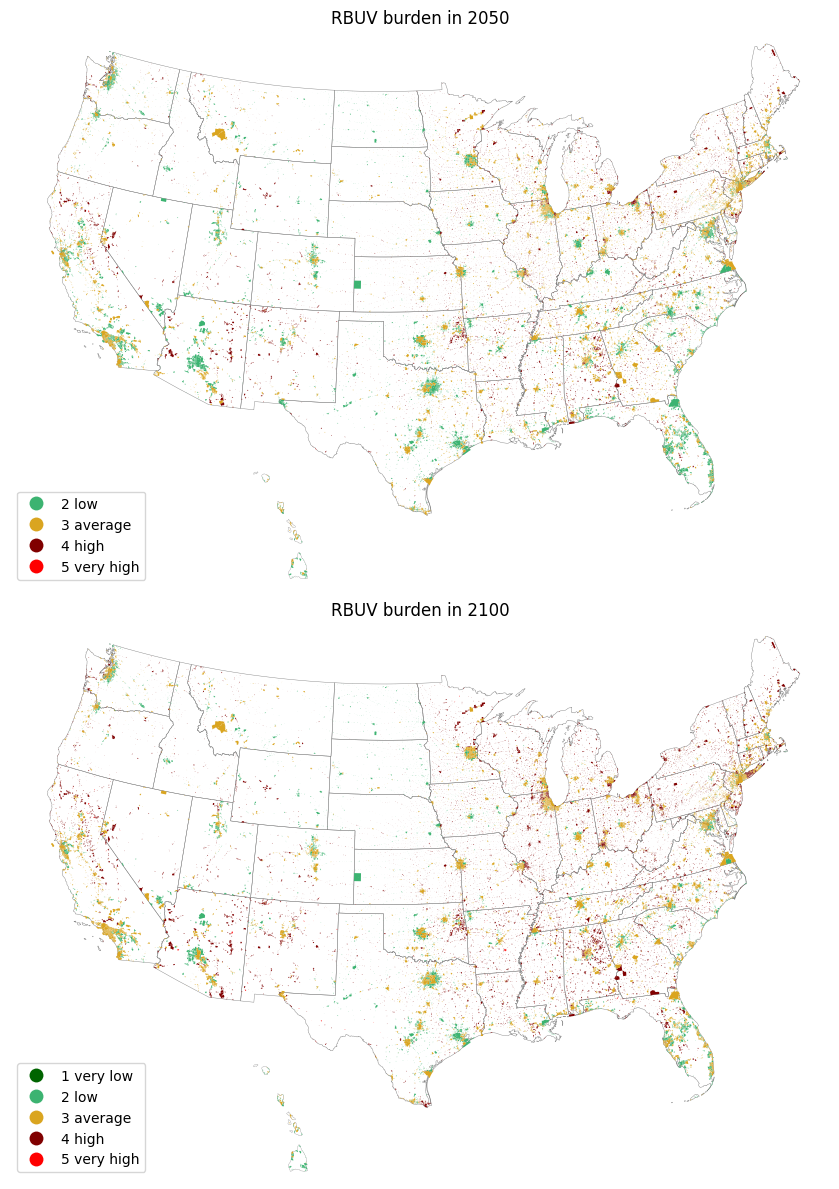

In [17]:
quantile_map_plot(df, ['Category_RBUV_2050', 'Category_RBUV_2100'])

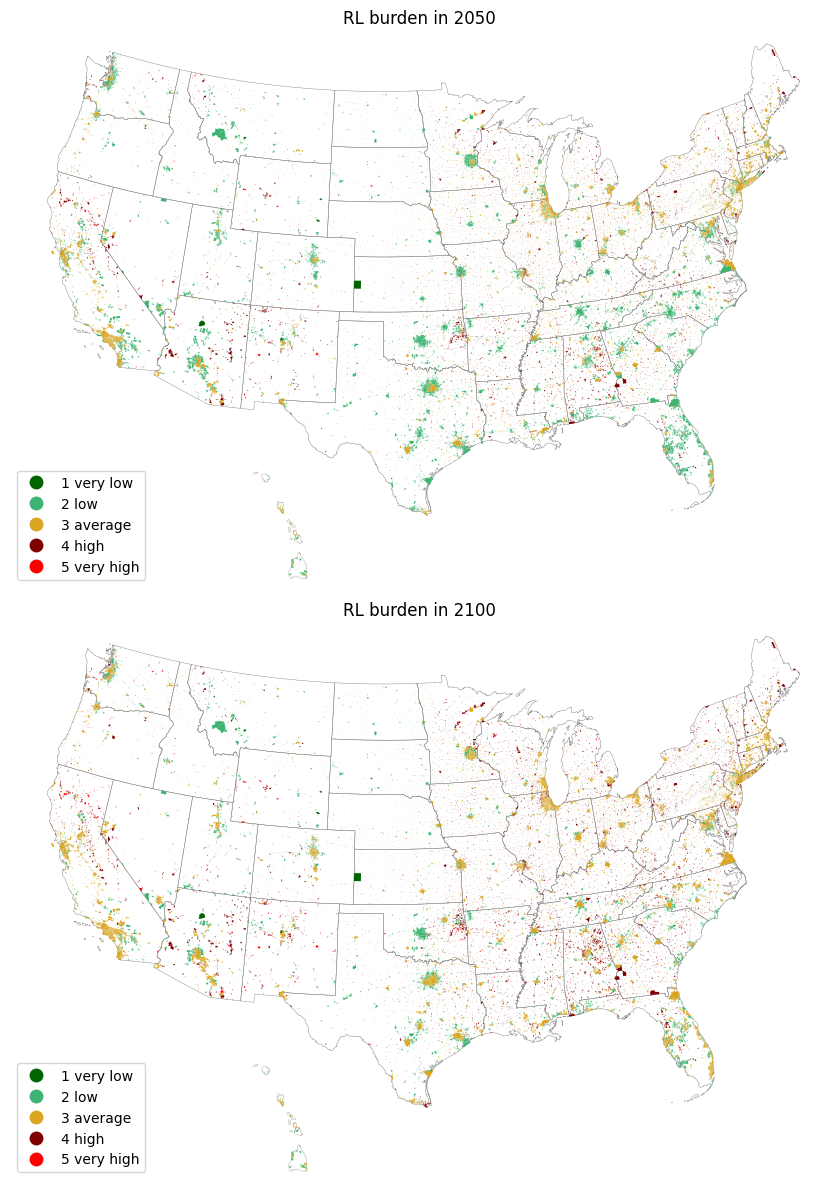

In [18]:
quantile_map_plot(df, ['Category_RL_2050', 'Category_RL_2100'])

In [28]:
df[['Category_RBUV_2050']].value_counts().sort_index(), df[['Category_RBUV_2100']].value_counts().sort_index(), df[['Category_RL_2050']].value_counts().sort_index(), df[['Category_RL_2100']].value_counts().sort_index()

(Category_RBUV_2050
 2 low                  7493
 3 average             11977
 4 high                10997
 5 very high               7
 Name: count, dtype: int64,
 Category_RBUV_2100
 1 very low                1
 2 low                  5325
 3 average              8856
 4 high                16146
 5 very high             146
 Name: count, dtype: int64,
 Category_RL_2050
 1 very low             80
 2 low                9467
 3 average           11222
 4 high               9552
 5 very high           153
 Name: count, dtype: int64,
 Category_RL_2100
 1 very low             63
 2 low                5957
 3 average            9936
 4 high              13761
 5 very high           757
 Name: count, dtype: int64)

In [26]:
# df.to_crs('EPSG:4326').geometry

In [25]:
# # Save the file as json to map
# df_json_50 = df.head(50).to_crs('EPSG:4326')  # Convert to WGS84 for GeoJSON compatibility
# with open(r"outputfiles\json\df_InfraBurden_map_sample.geojson", 'w') as f:
#     f.write(df_json_50.to_json())

In [24]:
# # Save the file as json to map
# df_json = df.to_crs('EPSG:4326')  # Convert to WGS84 for GeoJSON compatibility
# with open(r"outputfiles\json\df_InfraBurden_map.geojson", 'w') as f:
#     f.write(df_json.to_json())